In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lifetimes as life
pd.set_option("display.max_columns", 100)
%matplotlib inline

In [2]:
sales_data = pd.read_csv("orders_export All.csv", low_memory=False)
sales_data['Paid at'] = pd.to_datetime(sales_data['Paid at'])
sales_data['Fulfilled at'] = pd.to_datetime(sales_data['Fulfilled at'])
sales_data['Created at'] = pd.to_datetime(sales_data['Created at'])
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25727 entries, 0 to 25726
Data columns (total 71 columns):
Name                           25727 non-null object
Email                          21710 non-null object
Financial Status               11747 non-null object
Paid at                        11184 non-null datetime64[ns]
Fulfillment Status             11747 non-null object
Fulfilled at                   11704 non-null datetime64[ns]
Accepts Marketing              11747 non-null object
Currency                       11747 non-null object
Subtotal                       11747 non-null float64
Shipping                       11747 non-null float64
Taxes                          11747 non-null float64
Total                          11747 non-null float64
Discount Code                  2721 non-null object
Discount Amount                11747 non-null float64
Shipping Method                5600 non-null object
Created at                     25727 non-null datetime64[ns]
Lineitem quantit

In [3]:
sales_data_clean = sales_data.drop(sales_data.columns.to_series()[-11:-1], axis=1)
sales_data_clean

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,Lineitem requires shipping,Lineitem taxable,Lineitem fulfillment status,Billing Name,Billing Street,Billing Address1,Billing Address2,Billing Company,Billing City,Billing Zip,Billing Province,Billing Country,Billing Phone,Shipping Name,Shipping Street,Shipping Address1,Shipping Address2,Shipping Company,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Shipping Phone,Notes,Note Attributes,Cancelled at,Payment Method,Payment Reference,Refunded Amount,Vendor,Outstanding Balance,Employee,Location,Device ID,Id,Tags,Risk Level,Source,Lineitem discount,Phone
0,191569914-1461,NaN,paid,2017-12-05 07:22:33,fulfilled,2017-12-05 07:22:33,no,SGD,70.0,0.0,0.0,70.0,NaN,0.0,NaN,2017-12-05 07:22:32,1,Clear Acne Face Wash - 177 ml,27.0,NaN,6002,True,False,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,191569914-1461.1,0.0,Paula's Choice,0.0,Eli Goh,Front Porch,14.0,8.404976e+10,NaN,Low,pos,0.0,NaN
1,191569914-1461,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-05 07:22:32,1,Clear Acne Extra Strength Exfoliating Treatmen...,43.0,NaN,6210,True,False,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paula's Choice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,191569914-1460,NaN,paid,2017-12-05 07:21:53,fulfilled,2017-12-05 07:21:52,no,SGD,57.8,0.0,0.0,57.8,Discount,10.2,NaN,2017-12-05 07:21:52,1,Resist C15 Super Booster - 20 ml,68.0,NaN,7770,True,False,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,191569914-1460.1,0.0,Paula's Choice,0.0,Eli Goh,Front Porch,14.0,8.404956e+10,NaN,Low,pos,0.0,NaN
3,191569914-1459,norashikinmbarak@gmail.com,paid,2017-12-05 07:13:43,fulfilled,2017-12-05 07:13:43,yes,SGD,76.0,0.0,0.0,76.0,Discount,10.0,NaN,2017-12-05 07:13:43,1,Resist BHA 9 (Salicylic Acid) - 0.83 ml,14.0,NaN,7739,True,False,fulfilled,Nora Shikin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,191569914-1459.1,0.0,Paula's Choice,0.0,Eli Goh,Front Porch,14.0,8.404461e+10,NaN,Low,pos,0.0,NaN
4,191569914-1459,norashikinmbarak@gmail.com,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-05 07:13:43,1,Radiance Renewal Whitening Mask - 50ml,58.0,NaN,2760,True,False,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paula's Choice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
5,191569914-1459,norashikinmbarak@gmail.com,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-05 07:13:43,1,Clear Acne Regular Strength Cream 2.5% BP - 14 ml,14.0,NaN,6107,True,False,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paula's Choice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
6,191569912748,janerobin@hotmail.fr,paid,2017-12-05 06:42:35,fulfilled,2017-12-05 06:42:35,yes,SGD,148.0,0.0,0.0,148.0,NaN,0.0,NaN,2017-12-05 06:42:35,2,Resist Hyaluronic Acid Booster - 20 ml,74.0,0.0,7860,True,False,fulfilled,Jane Robin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,External Credit,c199192576019.1,0.0,Paula's Choice,0.0,Jeremy Tan,Beauty Collective,9.0,8.402511e+10,NaN,Low,pos,0.0,NaN
7,191569914-1458,NaN,paid,NaT,fulfilled,2017-12-05 06:25:59,no,SGD,0.0,0.0,0.0,0.0,Freesamples,6.5,NaN,2017-12-05 06:25:59,1,Skin Balancing Ultra-Sheer Daily Defense SPF 3...,1.5,NaN,1569,True,False,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Paula's Choice,0.0,Eli Goh,Front Porch,14.0,8.401469e+10,NaN,Low,pos,0.0,NaN
8,191569914-1458,NaN,NaN,NaT,

In [12]:
sales_data_2 = sales_data[sales_data['Financial Status'].isnull() == False]
sales_data_3 = sales_data_2[sales_data['Email'].isnull() == False]
sales_data_4 = sales_data_3[sales_data_3['Financial Status'] == 'paid']
sales_data_4

C:\Users\limzi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,Lineitem requires shipping,Lineitem taxable,Lineitem fulfillment status,Billing Name,Billing Street,Billing Address1,Billing Address2,Billing Company,Billing City,Billing Zip,Billing Province,Billing Country,Billing Phone,Shipping Name,Shipping Street,Shipping Address1,Shipping Address2,Shipping Company,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Shipping Phone,Notes,Note Attributes,Cancelled at,Payment Method,Payment Reference,Refunded Amount,Vendor,Outstanding Balance,Employee,Location,Device ID,Id,Tags,Risk Level,Source,Lineitem discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value,Tax 3 Name,Tax 3 Value,Tax 4 Name,Tax 4 Value,Tax 5 Name,Tax 5 Value,Phone
3,191569914-1459,norashikinmbarak@gmail.com,paid,2017-12-05 07:13:43,fulfilled,2017-12-05 07:13:43,yes,SGD,76.0,0.0,0.0,76.0,Discount,10.0,NaN,2017-12-05 07:13:43,1,Resist BHA 9 (Salicylic Acid) - 0.83 ml,14.0,NaN,7739,True,False,fulfilled,Nora Shikin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,191569914-1459.1,0.0,Paula's Choice,0.0,Eli Goh,Front Porch,14.0,8.404461e+10,NaN,Low,pos,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,191569912748,janerobin@hotmail.fr,paid,2017-12-05 06:42:35,fulfilled,2017-12-05 06:42:35,yes,SGD,148.0,0.0,0.0,148.0,NaN,0.0,NaN,2017-12-05 06:42:35,2,Resist Hyaluronic Acid Booster - 20 ml,74.0,0.0,7860,True,False,fulfilled,Jane Robin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,External Credit,c199192576019.1,0.0,Paula's Choice,0.0,Jeremy Tan,Beauty Collective,9.0,8.402511e+10,NaN,Low,pos,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,191569912743,tini4699@ymail.com,paid,2017-12-05 04:25:44,unfulfilled,NaT,yes,SGD,124.0,0.0,0.0,124.0,a79e4c967d49,10.0,Free Delivery (2 Working Days),2017-12-05 04:25:44,1,Resist Perfectly Balanced Foaming Cleanser - 1...,36.0,NaN,7830,True,False,pending,Rokiah Rugiman,Blk 349 Ubi Ave 1 #04-1045,Blk 349 Ubi Ave 1 #04-1045,NaN,NaN,Singapore,'400349,NaN,SG,9751 5384,Rokiah Rugiman,Blk 349 Ubi Ave 1 #04-1045,Blk 349 Ubi Ave 1 #04-1045,NaN,NaN,Singapore,'400349,NaN,SG,9751 5384,NaN,NaN,NaN,Stripe,c198925352979.1,0.0,Paula's Choice,0.0,NaN,NaN,NaN,8.392062e+10,NaN,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,191569912742,limin.90@hotmail.com,paid,2017-12-05 03:52:16,fulfilled,2017-12-05 03:52:16,yes,SGD,104.0,0.0,0.0,104.0,NaN,0.0,NaN,2017-12-05 03:52:16,1,Resist 10% Niacinamide Booster - 20 ml,61.0,0.0,7980,True,False,fulfilled,Li Min Lai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,External Credit,c198844186643.1,0.0,Paula's Choice,0.0,Jeremy Tan,Beauty Collective,9.0,8.388467e+10,NaN,Low,pos,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,191569912741,Sharon_yuyan@yahoo.com,paid,2017-12-05 02:02:39,unfulfilled,NaT,yes,SGD,112.0,0.0,0.0,112.0,NaN,0.0,Free Delivery (2 Working Days),2017-12-05 02:02:38,1,Radiance Renewal Whitening Mask - 50ml,58.0,NaN,2760,True,False,pending,Sharon Wah,"3 Bishan Street 15 #36-12, Sky Vue",3 Bishan Street 15 #36-12,Sky Vue,NaN,Singapore,'573911,NaN,SG,9618 2333,Sharon Wah,"3 Bishan Street 15 #36-12, Sky Vue",3 Bishan Street 15 #36-12,Sky Vue,NaN,Singapore,'573911,NaN,SG,9618 2333,NaN,NaN,NaN,Stripe,c198308167699.1,0.0,Paula's Choice,0.0,NaN,NaN,NaN,8.373912e+10,NaN,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,191569912740,bollen.katrien@gmail.com,paid,2017-12-05 01:23:46,unfulfilled,NaT,no,SGD,43.0,5.5,0.0,48.5,NaN,0.0,2 Working-Day Delivery,2017-12-05 01:23:46,1,Skin Perfecting 2% BHA (Salicylic Acid) Liquid...,43.0,NaN,2010,True,False,pending,Katrien Bollen,Kim Yam road 62,Kim Yam road 62,NaN,NaN,Singapore,'239363,NaN,SG,9677 9130,Kat

In [21]:
sales_data_5 = sales_data_4[['Paid at', 'Email']].reset_index()
sales_data_5.drop(['index'], axis=1, inplace=True)

In [23]:
sales_data_5.to_csv("transaction_history.csv")

In [24]:
sales_data_5.head()

,Paid at,Email
0,2017-12-05 07:13:43,norashikinmbarak@gmail.com
1,2017-12-05 06:42:35,janerobin@hotmail.fr
2,2017-12-05 04:25:44,tini4699@ymail.com
3,2017-12-05 03:52:16,limin.90@hotmail.com
4,2017-12-05 02:02:39,Sharon_yuyan@yahoo.com


In [25]:
from lifetimes.datasets import load_transaction_data
from lifetimes.utils import summary_data_from_transaction_data

In [26]:
summary = summary_data_from_transaction_data(sales_data_5, customer_id_col= 'Email', datetime_col='Paid at', observation_period_end=None)

In [28]:
summary.sort_values(by='frequency', ascending=False)

,frequency,recency,T
Email,,,
aliceklk@gmail.com,25.0,336.0,361.0
charissa_chang@hotmail.com,19.0,320.0,344.0
rogini611@gmail.com,18.0,340.0,368.0
lavie_ind@yahoo.com,18.0,348.0,359.0
juhinggeklynn@gmail.com,18.0,227.0,238.0
gemma.l.kyle@gmail.com,16.0,340.0,341.0
eileenong35@hotmail.com,16.0,352.0,361.0
yashoda_20@hotmail.com,16.0,342.0,346.0
jadeywj@hotmail.com,15.0,348.0,359.0


In [30]:
from lifetimes import BetaGeoFitter

# similar API to scikit-learn and lifelines.
bgf = BetaGeoFitter()
bgf.fit(summary['frequency'], summary['recency'], summary['T'])
print (bgf)


<lifetimes.BetaGeoFitter: fitted with 4672 subjects, a: 0.04, alpha: 127.69, b: 0.79, r: 0.59>


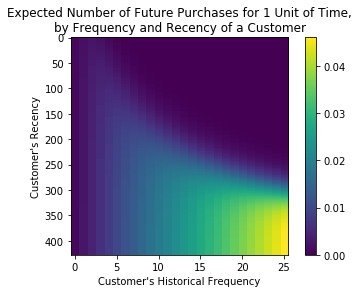

In [42]:
from lifetimes.plotting import plot_frequency_recency_matrix

plot_frequency_recency_matrix(bgf)
plt.savefig('CLTV.png')
plt.show()


We can see that if a customer has bought 25 times from you, and their lastest purchase was when they were 35 weeks old (given the individual is 35 weeks old), then they are you best customer (bottom-right). You coldest customers are those that in the top-right corner: they bought a lot quickly, and we haven't seen them in weeks.

There's also that beautiful "tail" around (5,25). That represents the customer who buys infrequently, but we've seen him or her recently, so they *might* buy again - we're not sure if they are dead or just between purchases.

In [47]:
t = 1
summary['predicted_purchases'] = summary.apply(lambda r: bgf.conditional_expected_number_of_purchases_up_to_time(t, r['frequency'], r['recency'], r['T']), axis=1)
summary.sort_values(by='predicted_purchases', ascending=False)

,frequency,recency,T,predicted_purchases
Email,,,,
aliceklk@gmail.com,25.0,336.0,361.0,0.052073
juhinggeklynn@gmail.com,18.0,227.0,238.0,0.050659
charissa_chang@hotmail.com,19.0,320.0,344.0,0.041312
lavie_ind@yahoo.com,18.0,348.0,359.0,0.038083
rogini611@gmail.com,18.0,340.0,368.0,0.037282
gemma.l.kyle@gmail.com,16.0,340.0,341.0,0.035319
yashoda_20@hotmail.com,16.0,342.0,346.0,0.034937
jerlyn@hotmail.sg,14.0,281.0,292.0,0.034636
phyuwint1231@gmail.com,15.0,327.0,330.0,0.033977


In [48]:
summary.to_excel('CLTV_analysis.xlsx')

In [49]:
sales_data_clean[sales_data_clean['Email'] == "aliceklk@gmail.com"]

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,Lineitem requires shipping,Lineitem taxable,Lineitem fulfillment status,Billing Name,Billing Street,Billing Address1,Billing Address2,Billing Company,Billing City,Billing Zip,Billing Province,Billing Country,Billing Phone,Shipping Name,Shipping Street,Shipping Address1,Shipping Address2,Shipping Company,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Shipping Phone,Notes,Note Attributes,Cancelled at,Payment Method,Payment Reference,Refunded Amount,Vendor,Outstanding Balance,Employee,Location,Device ID,Id,Tags,Risk Level,Source,Lineitem discount,Phone
1902,191569914-1378,aliceklk@gmail.com,paid,2017-11-10 08:00:12,fulfilled,2017-11-10 08:00:11,yes,SGD,43.0,0.0,0.0,43.0,Discount,5.0,NaN,2017-11-10 08:00:11,1,Resist Daily Pore-Refining Treatment 2% BHA (S...,48.0,NaN,7820,True,False,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stripe,c67180920851.1,0.0,Paula's Choice,0.0,Eli Goh,Front Porch,14.0,3.093168e+10,NaN,Low,pos,0.0,NaN
1970,191569914-1369,aliceklk@gmail.com,paid,2017-11-09 09:26:01,fulfilled,2017-11-09 09:26:01,yes,SGD,72.0,0.0,0.0,72.0,NaN,0.0,NaN,2017-11-09 09:26:01,2,Resist Perfectly Balanced Foaming Cleanser - 1...,36.0,NaN,7830,True,False,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stripe,c63955107859.1,0.0,Paula's Choice,0.0,Eli Goh,Front Porch,14.0,2.956100e+10,NaN,Low,pos,0.0,NaN
2311,191569914-1350,aliceklk@gmail.com,paid,2017-11-03 09:43:42,fulfilled,2017-11-03 09:43:41,yes,SGD,43.0,0.0,0.0,43.0,Discount,15.0,NaN,2017-11-03 09:43:41,2,All Over Hair & Body Shampoo - 429 ml,29.0,NaN,5000,True,False,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stripe,c44081938451.1,0.0,Paula's Choice,0.0,Eli Goh,Front Porch,14.0,1.738781e+10,NaN,Low,pos,0.0,NaN
3995,191569914-1272,aliceklk@gmail.com,paid,2017-10-10 03:54:32,fulfilled,2017-10-10 03:54:31,yes,SGD,209.0,0.0,0.0,209.0,Discount,15.0,NaN,2017-10-10 03:54:31,1,Power Couple: Resist C15 & Ultra-Light Antioxi...,109.0,NaN,4890,True,False,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stripe,c16987630163.1,0.0,Paula's Choice,0.0,Eli Goh,Front Porch,14.0,6.207809e+09,NaN,Low,pos,0.0,NaN
3996,191569914-1272,aliceklk@gmail.com,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-10 03:54:31,1,Resist Weightless Advanced Repairing Toner - 1...,38.0,NaN,7780,True,False,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paula's Choice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3997,191569914-1272,aliceklk@gmail.com,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-10 03:54:31,1,Resist Youth-Extending Daily Hydrating Fluid S...,48.0,NaN,7800,True,False,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paula's Choice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3998,191569914-1272,aliceklk@gmail.com,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-10 03:54:31,1,All Over Hair & Body Shampoo - 429 ml,29.0,NaN,5000,True,False,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paula's Choice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
5551,191569914-1172,aliceklk@gmail.com,paid,2017-09-18 08:58:05,fulfilled,2017-09-18 08:58:05,yes,SGD,122.0,0.0,0.0,122.0,NaN,0.0,NaN,2017-09-18 08:58:05,1,All Over Hair & Body Shampoo - 429 ml,29.0,NaN,5000,True,False,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stripe,c16828941907.1,0.0,Paula's Ch